# WeatherPy - Tyler Hill

In [97]:
import pandas as pd
import requests
import json
import random
import matplotlib.pyplot as plt
from scipy import stats
from pprint import pprint
from api_keys import weather_api_key
from citipy import citipy

In [98]:
# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

In [119]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Create lists to store values from for-loop
lats = []
lons = []
cities = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Declare number of samples to calculate
num_samples = 10

for x in range(num_samples):
    
    # Randomly generate Latitude and Longitude, append values
    lat = random.uniform(-90,90)
    lon = random.uniform(-180,180)
    
    # Grab nearest city from Lat + Lon, then append 'cities' list
    city = citipy.nearest_city(lat, lon)
    f_city = city.city_name.title()
    f_country = city.country_code.upper()
    city_country = f'{f_city}, {f_country}'
    if city_country not in cities:
        cities.append(city_country)

city = []
for i, response in enumerate(cities):
    q_url = f'{url}&units={units}&q={cities[i]}&APPID={weather_api_key}'
    response = requests.get(q_url).json()
    try:
        temp = response["main"]["temp"]
        humid = response["main"]["humidity"]
        cloud = response["clouds"]["all"]
        wind = response["wind"]["speed"]
        latc = response["coord"]["lat"]
        lonc = response["coord"]["lon"]
        lats.append(latc)
        lons.append(lonc)
        city.append(cities[i])
        temperature.append(temp)
        humidity.append(humid)
        cloudiness.append(cloud)
        wind_speed.append(wind)
        print(f'[{i}]: {cities[i]}')
    except:
        print("No data")
        pass


# Build dataframe from collected values
df = pd.DataFrame({
    "City": city,
    "Latitude": lats,
    "Longitude": lons,
    "Temperature": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
})

# Display dataframe
df.head()

[0]: Barrow, US
[1]: Miramar, MX
[2]: Jamestown, SH
[3]: Atuona, PF
[4]: Busselton, AU
[5]: Longyearbyen, SJ
[6]: Ballina, AU
[7]: Butaritari, KI
[8]: Rikitea, PF
[9]: Roma, AU


,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,"Barrow, US",71.2906,-156.7887,17.62,79,100,8.05
1,"Miramar, MX",22.3333,-97.8667,78.01,89,2,10.27
2,"Jamestown, SH",-15.9387,-5.7168,68.45,75,100,20.47
3,"Atuona, PF",-9.8000,-139.0333,79.20,75,6,15.86
4,"Busselton, AU",-33.6500,115.3333,74.75,35,0,3.31


In [100]:
# Write DataFrame to csv
output_file = "Output/WeatherPy.csv"
df.to_csv(output_file,index=False, header=True)

In [101]:
# Declare column values for ease of use
lats = df["Latitude"]
longs = df["Longitude"]
temps = df["Temperature"]
humids = df["Humidity"]
clouds = df["Cloudiness"]
winds = df["Wind Speed"]

In [102]:
# Determine max and min values to determine xlim for each plot
temp_min = temps.min()
temp_max = temps.max()

humid_min = humids.min()
humid_max = humids.max()

cloud_min = clouds.min()
cloud_max = clouds.max()

wind_min = winds.min()
wind_max = winds.max()

# Scatter Plots

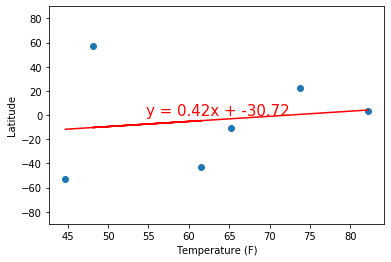

In [103]:
# Temp vs. Latitude
plt.scatter(temps, lats)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(temp_min-2, temp_max+2)

slope, int, r, p, std_err = stats.linregress(temps, lats)
y = slope * temps + int
plt.plot(temps,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(temp_min+10,0),fontsize=15,color="red")

plt.savefig("Output/Images/temp_vs_lat.png")

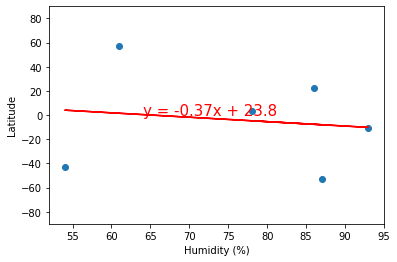

In [104]:
# Humidity vs. Latitude
plt.scatter(humids, lats)
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(humid_min-2,humid_max+2)

slope, int, r, p, std_err = stats.linregress(humids, lats)
y = slope * humids + int
plt.plot(humids,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(humid_min+10,0),fontsize=15,color="red")

plt.savefig("Output/Images/humid_vs_lat.png")

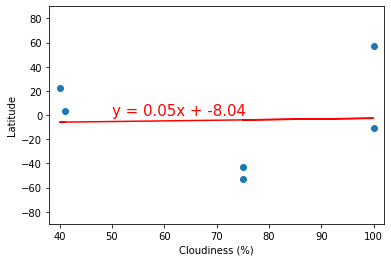

In [105]:
# Cloudiness vs. Latitude
plt.scatter(clouds, lats)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(cloud_min-2, cloud_max+2)

slope, int, r, p, std_err = stats.linregress(clouds, lats)
y = slope * clouds + int
plt.plot(clouds,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(cloud_min+10,0),fontsize=15,color="red")

plt.savefig("Output/Images/cloud_vs_lat.png")

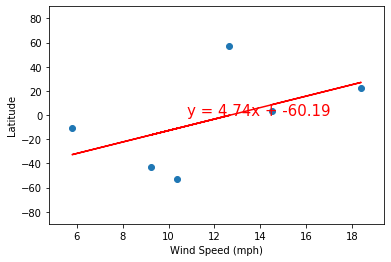

In [106]:
# Wind speed vs. Latitude
plt.scatter(winds, lats)
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(wind_min-1, wind_max+1)

slope, int, r, p, std_err = stats.linregress(winds, lats)
y = slope * winds + int
plt.plot(winds,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(wind_min+5,0),fontsize=15,color="red")

plt.savefig("Output/Images/windspeed_vs_lat.png")

# Separate values into Northern and Southern Hemispheres

In [107]:
hemisphere = []
for index, row in df.iterrows():
    lat = row["Latitude"]
    if lat >= 0:
        hem = "Northern"
        hemisphere.append(hem)
    elif lat < 0:
        hem = "Southern"
        hemisphere.append(hem)
df["Hemisphere"] = hemisphere
df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Hemisphere
0,"Butaritari, KI",3.0707,172.7902,82.18,78,41,14.50,Northern
1,"Kapaa, US",22.0752,-159.3190,73.78,86,40,18.41,Northern
2,"Hualmay, PE",-11.0964,-77.6139,65.28,93,100,5.79,Southern
3,"Sitka, US",57.0531,-135.3300,48.09,61,100,12.66,Northern
4,"Hobart, AU",-42.8794,147.3294,61.57,54,75,9.22,Southern


In [108]:
n_hem = df.loc[(df["Hemisphere"]) == "Northern"]
s_hem = df.loc[(df["Hemisphere"]) == "Southern"]

In [109]:
n_lats = n_hem["Latitude"]
s_lats = s_hem["Latitude"]
n_longs = n_hem["Longitude"]
s_longs = s_hem["Longitude"]
n_temps = n_hem["Temperature"]
s_temps = s_hem["Temperature"]
n_humids = n_hem["Humidity"]
s_humids = s_hem["Humidity"]
n_clouds = n_hem["Cloudiness"]
s_clouds = s_hem["Cloudiness"]
n_winds = n_hem["Wind Speed"]
s_winds = s_hem["Wind Speed"]

In [110]:
min_n_temps = n_temps.min()
max_n_temps = n_temps.max()
min_s_temps = s_temps.min()
max_s_temps = s_temps.max()

min_n_humids = n_humids.min()
max_n_humids = n_humids.max()
min_s_humids = s_humids.min()
max_s_humids = s_humids.max()

min_n_clouds = n_clouds.min()
max_n_clouds = n_clouds.max()
min_s_clouds = s_clouds.min()
max_s_clouds = s_clouds.max()

min_n_winds = n_winds.min()
max_n_winds = n_winds.max()
min_s_winds = s_winds.min()
max_s_winds = s_winds.max()

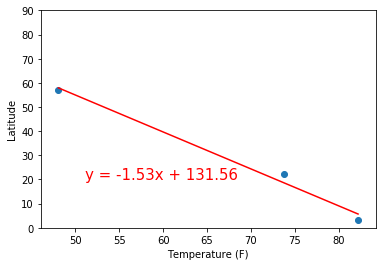

In [111]:
# Temp vs. Latitude # Northern Hemisphere
plt.scatter(n_temps, n_lats)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.ylim(0,90)
plt.xlim(min_n_temps-2, max_n_temps+2)

slope, int, r, p, std_err = stats.linregress(n_temps, n_lats)
y = slope * n_temps + int
plt.plot(n_temps,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(min_n_temps+3,20),fontsize=15,color="red")

plt.savefig("Output/Images/Northern Hemisphere/temps_vs_lat.png")

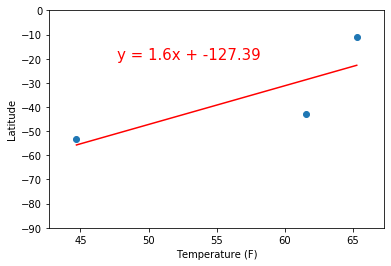

In [112]:
# Temp vs. Latitude # Southern Hemisphere
plt.scatter(s_temps, s_lats)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.ylim(-90,0)
plt.xlim(min_s_temps-2, max_s_temps+2)

slope, int, r, p, std_err = stats.linregress(s_temps, s_lats)
y = slope * s_temps + int
plt.plot(s_temps,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(min_s_temps+3,-20),fontsize=15,color="red")

plt.savefig("Output/Images/Southern Hemisphere/temps_vs_lat.png")

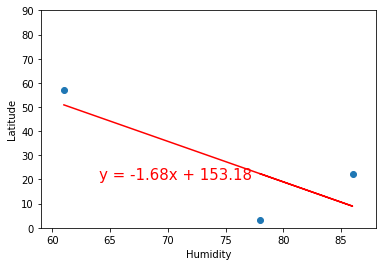

In [113]:
# Humidity vs. Latitude # Northern Hemisphere
plt.scatter(n_humids, n_lats)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.ylim(0,90)
plt.xlim(min_n_humids-2, max_n_humids+2)

slope, int, r, p, std_err = stats.linregress(n_humids, n_lats)
y = slope * n_humids + int
plt.plot(n_humids,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(min_n_humids+3,20),fontsize=15,color="red")

plt.savefig("Output/Images/Northern Hemisphere/humid_vs_lat.png")

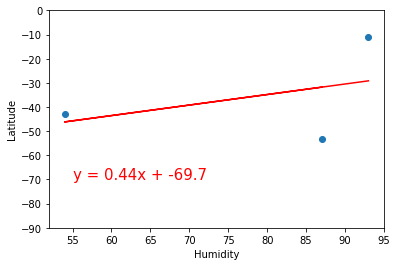

In [114]:
# Humidity vs. Latitude # Southern Hemisphere
plt.scatter(s_humids, s_lats)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.ylim(-90,0)
plt.xlim(min_s_humids-2, max_s_humids+2)

slope, int, r, p, std_err = stats.linregress(s_humids, s_lats)
y = slope * s_humids + int
plt.plot(s_humids,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(min_s_humids+1,-70),fontsize=15,color="red")

plt.savefig("Output/Images/Southern Hemisphere/humid_vs_lat.png")

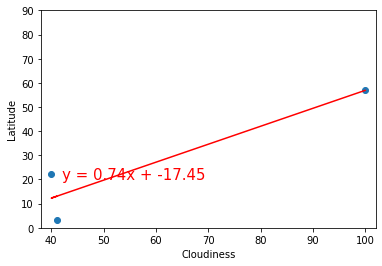

In [115]:
# Cloudiness vs. Latitude # Northern Hemisphere
plt.scatter(n_clouds, n_lats)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.ylim(0,90)
plt.xlim(min_n_clouds-2, max_n_clouds+2)

slope, int, r, p, std_err = stats.linregress(n_clouds, n_lats)
y = slope * n_clouds + int
plt.plot(n_clouds,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(min_n_clouds+2,20),fontsize=15,color="red")

plt.savefig("Output/Images/Northern Hemisphere/cloud_vs_lat.png")

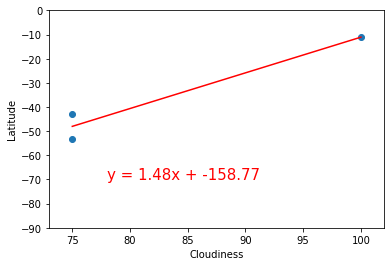

In [116]:
# Cloudiness vs. Latitude # Southern Hemisphere
plt.scatter(s_clouds, s_lats)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.ylim(-90,0)
plt.xlim(min_s_clouds-2, max_s_clouds+2)

slope, int, r, p, std_err = stats.linregress(s_clouds, s_lats)
y = slope * s_clouds + int
plt.plot(s_clouds,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(min_s_clouds+3,-70),fontsize=15,color="red")

plt.savefig("Output/Images/Southern Hemisphere/cloud_vs_lat.png")

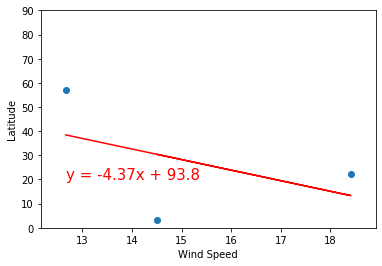

In [117]:
# Wind Speed vs. Latitude # Northern Hemisphere
plt.scatter(n_winds, n_lats)
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.ylim(0,90)
plt.xlim(min_n_winds-0.5, max_n_winds+0.5)

slope, int, r, p, std_err = stats.linregress(n_winds, n_lats)
y = slope * n_winds + int
plt.plot(n_winds,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(min_n_winds,20),fontsize=15,color="red")

plt.savefig("Output/Images/Northern Hemisphere/windspeed_vs_lat.png")

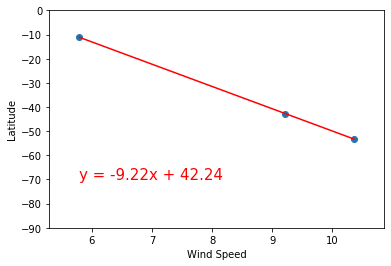

In [118]:
# Wind Speed vs. Latitude # Southern Hemisphere
plt.scatter(s_winds, s_lats)
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.ylim(-90,0)
plt.xlim(min_s_winds-0.5, max_s_winds+0.5)

slope, int, r, p, std_err = stats.linregress(s_winds, s_lats)
y = slope * s_winds + int
plt.plot(s_winds,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(min_s_winds,-70),fontsize=15,color="red")

plt.savefig("Output/Images/Southern Hemisphere/windspeed_vs_lat.png")